### load derived data (json file) into pandas

- load data downloaded from WOS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jsonlines
import doi as doiLib
from unpywall.utils import UnpywallCredentials
from unpywall import Unpywall

In [2]:
with open("email") as fid:
    unpaywallcred = fid.readline()

UnpywallCredentials("nick.haupka@gmail.com")# could not get api cred on time, so using this email which is pasted all over the web.... #unpaywallcred)


Your email has been set.

In [3]:
dataPath = "../data/derived2/"
dataFile = "records.jsonl"

In [9]:
index = 0

#initialData = pd.DataFrame()
data = {"WOSUID":[],
            "pubTitle":[],
            "pubYear":[],
            "pubType":[],
            "journalTitle":[],
            "publisher":[],
            "area":[],
            "areaCount":[],
            "identifier":[],
            "keywords":[],
            "abstract":[],
            "doi":[],
            "url":[],
            "OA":[],
            "OA-pdf_url":[],
            #"issn":[],
                   }
with jsonlines.open(dataPath+dataFile) as reader:   
    for obj in reader:
        if index<1000000:
            try:
                wosID = obj["record"]["UID"][4:]
            except KeyError:
                wosID = None
            data["WOSUID"].append(wosID)
            data["pubTitle"].append(obj["record"]["static_data"]["summary"]["titles"]["title"][-1]["content"])
            data["pubYear"].append(obj["record"]["static_data"]["summary"]["pub_info"]["pubyear"])
            data["pubType"].append(obj["record"]["static_data"]["summary"]["doctypes"]["doctype"])
            data["journalTitle"].append(obj["record"]["static_data"]["summary"]["titles"]["title"][0]["content"])
               
            try:
                publisher = obj["record"]["static_data"]["summary"]["publishers"]["publisher"]["names"]["name"]["unified_name"]
            except KeyError:
                publisher = None
                
            data["publisher"].append(publisher)
            try:
                areaCount = obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]["count"]
                
            except KeyError:
                areaCount = None
            data["areaCount"].append(areaCount)
            
            try:
                area = obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]["subheading"]
                
            except KeyError:
                area = None
            data["area"].append(area)
            
            data["identifier"].append(obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"])
            
            try:
                keyword = obj["record"]["static_data"]["fullrecord_metadata"]["keywords"]["keyword"]
            except KeyError:
                keyword = None
            data["keywords"].append(keyword)

            try:
                abstract = obj["record"]["static_data"]["fullrecord_metadata"]["abstracts"]["abstract"]["abstract_text"]["p"]
            except KeyError:
                abstract = None
            
            data["abstract"].append(abstract)
            

            #doi = None
            #url = None
            #print(index)
            for item in obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"]:
                try:
                    if item["type"]=="doi" or item["type"]=="xref_doi":    
                        doi = item["value"]
                except TypeError:
                    doi=None
            data["doi"].append(doi)

            try:
                url = doiLib.get_real_url_from_doi(doi)
            
            except ValueError:
                url=None

            data["url"].append(url)
            if doi != None:
                up = Unpywall.doi(dois=[doi])
                if up.is_oa.any() == True:
                    data["OA"] = True
                    data["OA-pdf_url"] = up["best_oa_location.url_for_pdf"][0]
                else:
                    data["OA"] = False
                    data["OA-pdf_url"] = None
            else:
                data["OA"] = None
                data["OA-pdf_url"] = None




            
        index=index+1


In [22]:
data

{'WOSUID': ['000259541100020',
  '000237939600011',
  '000274787200036',
  '000247691600062',
  '000287083200155',
  '000261215000045',
  '000263827200159',
  '000276815500078',
  '000276080400281',
  '000230426500054'],
 'pubTitle': ['A low-cost open-hardware wideband multiple-input-multiple-output (MIMO) wireless channel sounder',
  'openEyes: an open-hardware open-source system for low-cost eye tracking',
  'IEEE Latin American Conference on Communications',
  'Open hardware platform helps students getting started in analog and digital design',
  'Frontiers in Education Conference',
  'An Open Localization and Local Communication Embodied Sensor',
  'IEEE International Joint Conference on Neural Networks (IJCNN)',
  'Proceedings of the IEEE International Symposium on Industrial Electronics',
  'IEEE International Conference on Robotics and Automation ICRA',
  'Tools for in-circuit testing of on-line content processing hardware'],
 'pubYear': [2008, 2006, 2009, 2007, 2010, 2008, 2008

In [6]:
df = pd.DataFrame.from_dict(data)
#df
articles = df[df["pubType"]=="Article"]


In [7]:
df

,WOSUID,pubTitle,pubYear,pubType,journalTitle,publisher,area,areaCount,identifier,keywords,abstract,doi,url,OA,OA-pdf_url
0,000259541100020,A low-cost open-hardware wideband multiple-inp...,2008,Article,IEEE TRANSACTIONS ON INSTRUMENTATION AND MEASU...,IEEE,Technology,1,"[{'type': 'issn', 'value': '0018-9456'}, {'typ...","[measurement, multiple-input-multiple-output (...",Due to the complexity of multiple-input-multip...,10.1109/TIM.2008.919943,http://ieeexplore.ieee.org/document/4484546/,False,None
1,000237939600011,openEyes: an open-hardware open-source system ...,2006,"[Article, Proceedings Paper]",JOURNAL OF MODERN OPTICS,Taylor & Francis,Physical Sciences,1,"[{'type': 'issn', 'value': '0950-0340'}, {'typ...",None,Eye tracking has long held the promise of bein...,10.1080/09500340600619072,http://www.tandfonline.com/doi/abs/10.1080/095...,False,None
2,000274787200036,IEEE Latin American Conference on Communications,2009,Proceedings Paper,2009 IEEE LATIN-AMERICAN CONFERENCE ON COMMUNI...,IEEE,Technology,1,"[{'type': 'issn', 'value': '2330-989X'}, {'typ...",None,This work presents an on-going project that co...,10.1080/09500340600619072,http://www.tandfonline.com/doi/abs/10.1080/095...,False,None
3,000247691600062,Open hardware platform helps students getting ...,2007,Proceedings Paper,2007 IEEE INTERNATIONAL CONFERENCE ON MICROELE...,IEEE,Technology,1,"[{'type': 'isbn', 'value': '978-0-7695-2849-6'...",None,A common multidisciplinary platform can improv...,10.1109/MSE.2007.70,http://ieeexplore.ieee.org/document/4231484/,False,None
4,000287083200155,Frontiers in Education Conference,2010,Proceedings Paper,2010 IEEE FRONTIERS IN EDUCATION CONFERENCE (FIE),IEEE,Technology,1,"[{'type': 'issn', 'value': '0190-5848'}, {'typ...","[Laboratories, kits, Arduino]",We present a lab kit platform based on an Ardu...,10.1109/MSE.2007.70,http://ieeexplore.ieee.org/document/4231484/,False,None
5,000261215000045,An Open Localization and Local Communication E...,2008,Article,SENSORS,Mdpi,"[Physical Sciences, Technology]",2,"[{'type': 'eissn', 'value': '1424-8220'}, {'ty...","[Localization, local communication, range and ...",In this paper we describe a localization and l...,10.3390/s8117545,http://www.mdpi.com/1424-8220/8/11/7545,False,None
6,000263827200159,IEEE International Joint Conference on Neural ...,2008,Proceedings Paper,2008 IEEE INTERNATIONAL JOINT CONFERENCE ON NE...,IEEE,Technology,1,"[{'type': 'issn', 'value': '1098-7576'}, {'typ...",None,An analog VLSI hardware architecture for the d...,10.1109/IJCNN.2008.4633916,http://ieeexplore.ieee.org/document/4633916/,False,None
7,000276815500078,Proceedings of the IEEE International Symposiu...,2009,Proceedings Paper,ISIE: 2009 IEEE INTERNATIONAL SYMPOSIUM ON IND...,IEEE,Technology,1,"[{'type': 'issn', 'value': '2163-5137'}, {'typ...",None,This paper presents the development and test o...,10.1109/ISIE.2009.5217929,http://ieeexplore.ieee.org/document/5217929/,False,None
8,000276080400281,IEEE International Conference on Robotics and ...,2009,Proceedings Paper,ICRA: 2009 IEEE INTERNATIONAL CONFERENCE ON RO...,IEEE,Technology,1,"[{'type': 'issn', 'value': '1050-4729'}, {'typ...",None,We have designed and built a new open hardware...,10.1109/ISIE.2009.5217929,http://ieeexplore.ieee.org/document/5217929/,False,None
9,000230426500054,Tools for in-circuit testing of on-line conten...,2005,Proceedings Paper,2005 IEEE INTERNATIONAL CONFERENCE ON MICROELE...,IEEE,Technology,1,"[{'type': 'isbn', 'value': '0-7695-2374-9'}, {...",None,Tools have been developed that enable in-circu...,10.1109/MSE.2005.62,http://ieeexplore.ieee.org/document/1509389/,False,None


In [8]:
articles.to_json(dataPath+"articles.json")

In [9]:
url = doiLib.get_real_url_from_doi(doi)

ValueError: HTTP 404: DOI not found

'http://ieeexplore.ieee.org/document/4484546/'

<AxesSubplot:xlabel='pubYear', ylabel='Count'>

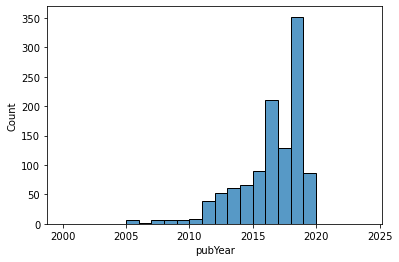

In [20]:
sns.histplot(articles["pubYear"],bins=list(range(2000,2025)))

In [16]:
#identifier
#obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"]

#WOSID 
#obj["record"]["UID"][4:]

#'find if this is an article
#obj["record"]["static_data"]["summary"]["doctypes"]["doctype"]

#find publication title
#obj["record"]["static_data"]["summary"]["titles"]["title"][-1]["content"]

#find journal title
#obj["record"]["static_data"]["summary"]["titles"]["title"][0]["content"]

#find publisher (elsevier, nature, etc)
#obj["record"]["static_data"]["summary"]["publishers"]["publisher"]["names"]["name"]["unified_name"]

#get publication year
#obj["record"]["static_data"]["summary"]["pub_info"]["pubyear"]

#find area (still requires more code to systematically extract all categories)
#obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]

### plot for the paper:
- number of papers in OSH over years
  - divide them per area (using research areas tags)
    - Engineering, life sciences, humanities?
- quality of the papers - how many fit the OSHWA OSH classification?
- Accessibility of the papers - how many are OA?